# Imports

In [34]:
import torch
import torch.nn as nn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
from IPython.core.display_functions import clear_output
from IPython.core.ultratb import VerboseTB

In [35]:
VerboseTB._tb_highlight = "bg:#e68cc3"

if "dracula" in plt.style.available:
    plt.style.use("dracula")

# Data preparation

In [16]:
iris = load_iris()

In [17]:
X = torch.tensor(iris.data).to(torch.float32)
y = torch.tensor(iris.target).to(torch.long)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Exploratory Data Analysis (EDA)

In [19]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = iris.target

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Range of values

In [22]:
df["sepal length (cm)"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

In [23]:
df["sepal width (cm)"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [24]:
df["petal length (cm)"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

In [25]:
df["petal width (cm)"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

### Visualize data in 2D

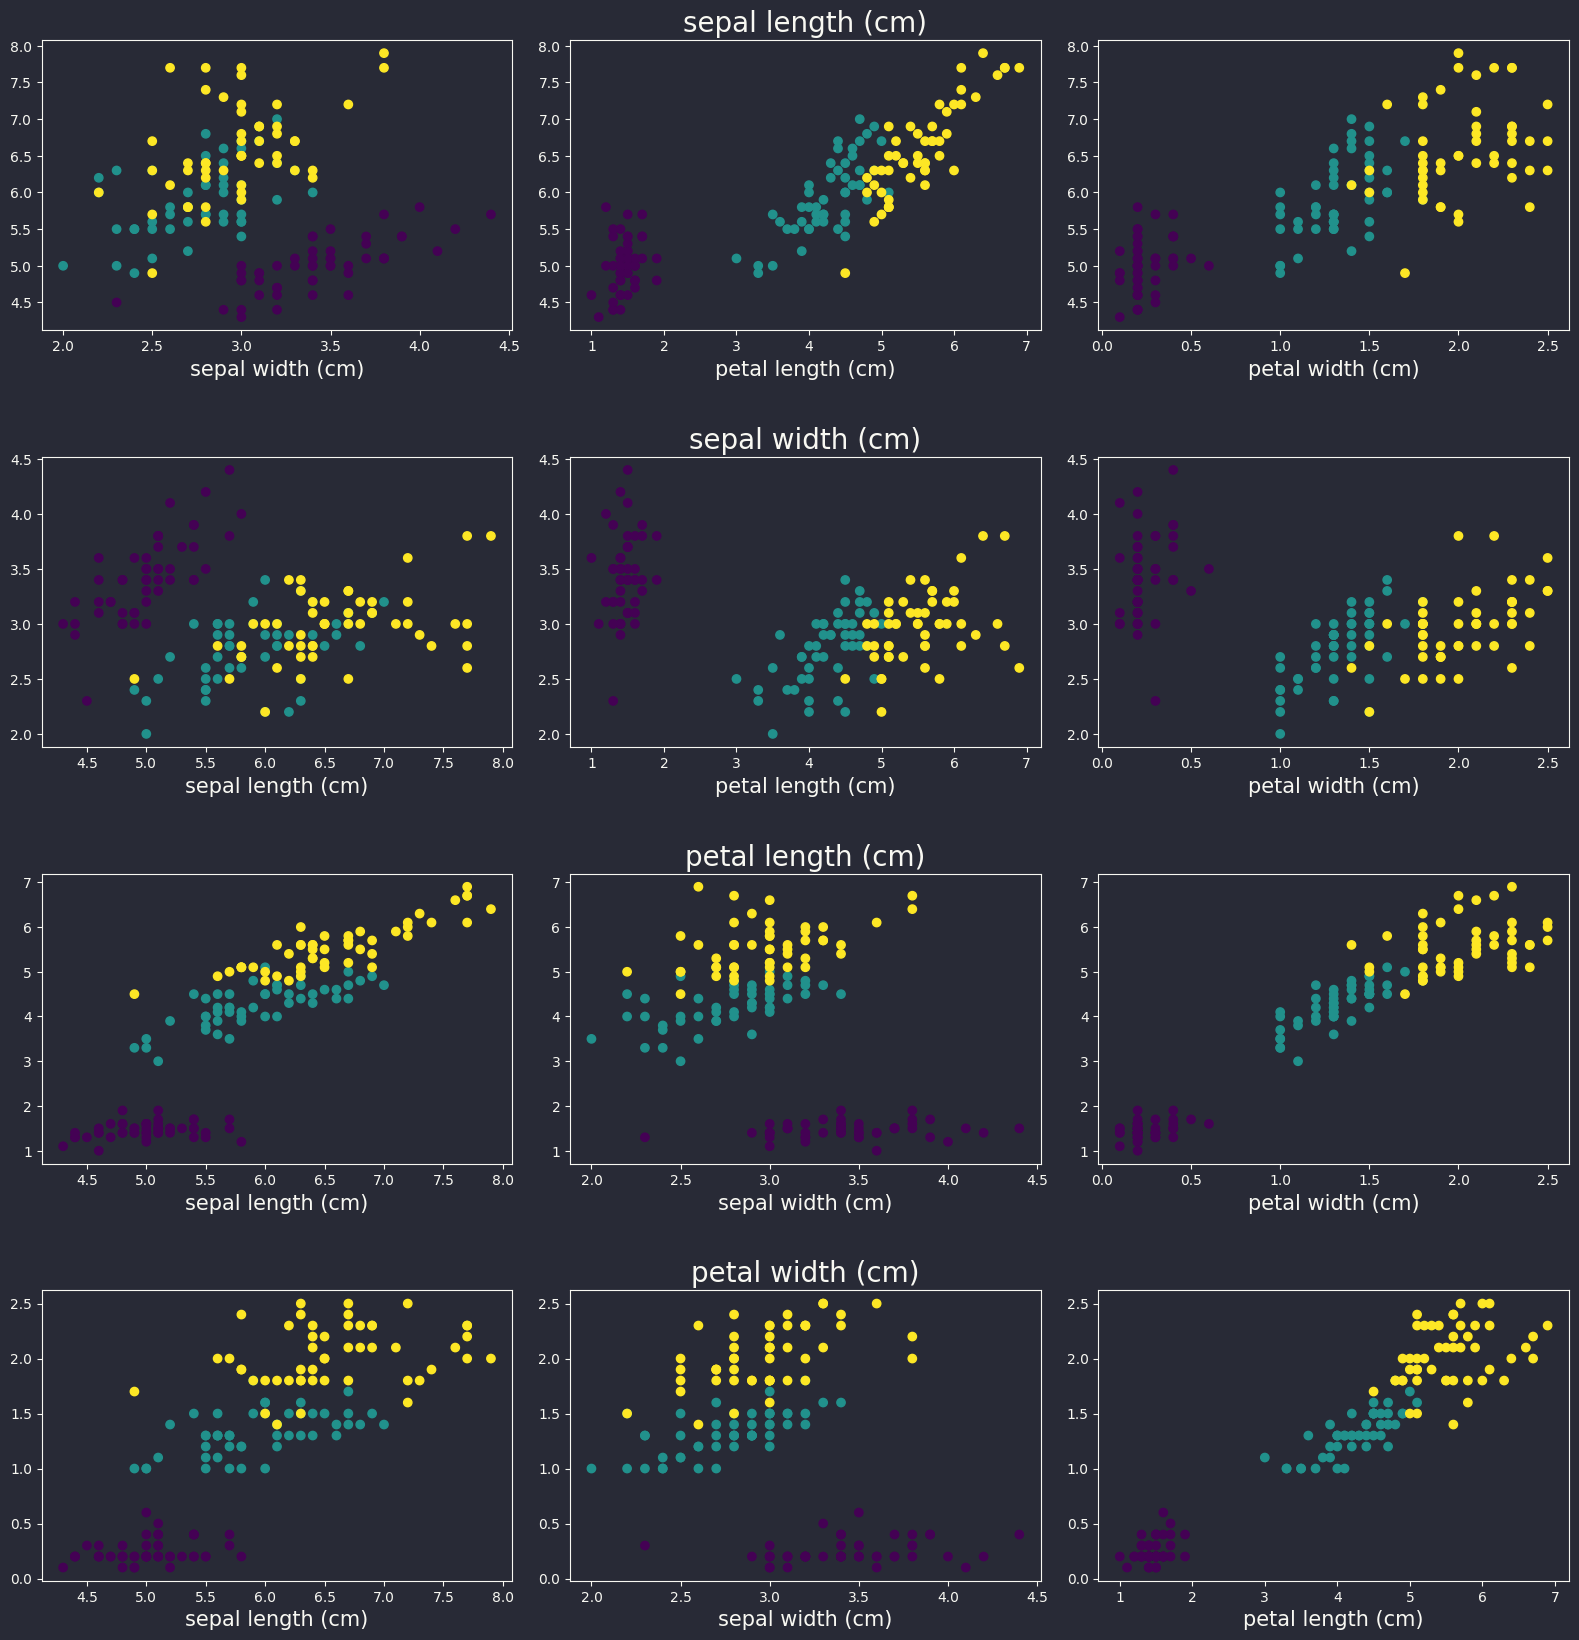

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(16, 16))
fig.tight_layout(h_pad=7)

ax[0, 1].set_title("sepal length (cm)", fontsize=20)
ax[0, 0].scatter(df["sepal width (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 0].set_xlabel("sepal width (cm)", fontsize=15)
ax[0, 1].scatter(df["petal length (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 1].set_xlabel("petal length (cm)", fontsize=15)
ax[0, 2].scatter(df["petal width (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[1, 1].set_title("sepal width (cm)", fontsize=20)
ax[1, 0].scatter(df["sepal length (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[1, 1].scatter(df["petal length (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 1].set_xlabel("petal length (cm)", fontsize=15)
ax[1, 2].scatter(df["petal width (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[2, 1].set_title("petal length (cm)", fontsize=20)
ax[2, 0].scatter(df["sepal length (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[2, 1].scatter(df["sepal width (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 1].set_xlabel("sepal width (cm)", fontsize=15)
ax[2, 2].scatter(df["petal width (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[3, 1].set_title("petal width (cm)", fontsize=20)
ax[3, 0].scatter(df["sepal length (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[3, 1].scatter(df["sepal width (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 1].set_xlabel("sepal width (cm)", fontsize=15)
ax[3, 2].scatter(df["petal length (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 2].set_xlabel("petal length (cm)", fontsize=15)

plt.show()

### Visualize data in 3D

In [27]:
keys = df.keys()

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(4, 3, 1, projection='3d')
ax2 = fig.add_subplot(4, 3, 2, projection='3d')
ax3 = fig.add_subplot(4, 3, 3, projection='3d')
ax4 = fig.add_subplot(4, 3, 4, projection='3d')
ax5 = fig.add_subplot(4, 3, 5, projection='3d')
ax6 = fig.add_subplot(4, 3, 6, projection='3d')
ax7 = fig.add_subplot(4, 3, 7, projection='3d')
ax8 = fig.add_subplot(4, 3, 8, projection='3d')
ax9 = fig.add_subplot(4, 3, 9, projection='3d')
ax10 = fig.add_subplot(4, 3, 10, projection='3d')
ax11 = fig.add_subplot(4, 3, 11, projection='3d')
ax12 = fig.add_subplot(4, 3, 12, projection='3d')

ax1.scatter(df[keys[1]], df[keys[2]], df[keys[0]], c=df[keys[4]])
ax1.set_xlabel(keys[1], fontsize=10)
ax1.set_ylabel(keys[2], fontsize=10)
ax2.scatter(df[keys[1]], df[keys[3]], df[keys[0]], c=df[keys[4]])
ax2.set_xlabel(keys[1], fontsize=10)
ax2.set_ylabel(keys[3], fontsize=10)
ax3.scatter(df[keys[2]], df[keys[3]], df[keys[0]], c=df[keys[4]])
ax3.set_xlabel(keys[2], fontsize=10)
ax3.set_ylabel(keys[3], fontsize=10)
ax2.set_title(keys[0], fontsize=15)

ax4.scatter(df[keys[0]], df[keys[2]], df[keys[1]], c=df[keys[4]])
ax4.set_xlabel(keys[0], fontsize=10)
ax4.set_ylabel(keys[2], fontsize=10)
ax5.scatter(df[keys[0]], df[keys[3]], df[keys[1]], c=df[keys[4]])
ax5.set_xlabel(keys[0], fontsize=10)
ax5.set_ylabel(keys[3], fontsize=10)
ax6.scatter(df[keys[2]], df[keys[3]], df[keys[1]], c=df[keys[4]])
ax6.set_xlabel(keys[2], fontsize=10)
ax6.set_ylabel(keys[3], fontsize=10)
ax5.set_title(keys[1], fontsize=15)

ax7.scatter(df[keys[0]], df[keys[1]], df[keys[2]], c=df[keys[4]])
ax7.set_xlabel(keys[0], fontsize=10)
ax7.set_ylabel(keys[1], fontsize=10)
ax8.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=df[keys[4]])
ax8.set_xlabel(keys[0], fontsize=10)
ax8.set_ylabel(keys[3], fontsize=10)
ax9.scatter(df[keys[1]], df[keys[3]], df[keys[2]], c=df[keys[4]])
ax9.set_xlabel(keys[1], fontsize=10)
ax9.set_ylabel(keys[3], fontsize=10)
ax8.set_title(keys[2], fontsize=15)

ax10.scatter(df[keys[0]], df[keys[1]], df[keys[3]], c=df[keys[4]])
ax10.set_xlabel(keys[0], fontsize=10)
ax10.set_ylabel(keys[1], fontsize=10)
ax11.scatter(df[keys[0]], df[keys[2]], df[keys[3]], c=df[keys[4]])
ax11.set_xlabel(keys[0], fontsize=10)
ax11.set_ylabel(keys[2], fontsize=10)
ax12.scatter(df[keys[1]], df[keys[2]], df[keys[3]], c=df[keys[4]])
ax12.set_xlabel(keys[1], fontsize=10)
ax12.set_ylabel(keys[2], fontsize=10)
ax11.set_title(keys[3], fontsize=15)

plt.show()

# Train func

In [29]:
def train(network, X_train, X_test, y_train, y_test, epochs, learning_rate, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []

    try:
        for epoch in range(epochs):
            # train
            network.train()
            losses = []
            accuracies = []

            network.zero_grad()
            prediction = network(X_train)
            loss_batch = loss(prediction, y_train)
            loss_batch.backward()
            optimizer.step()

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y_train.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))

            # test
            network.eval()
            losses = []
            accuracies = []

            prediction = network(X_test)
            loss_batch = loss(prediction, y_test)

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y_test.cpu().data.numpy()).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))

            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                    epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                    train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.plot(test_loss_epochs, label='Test')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.plot(test_accuracy_epochs, label='Test accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
        test_loss_epochs, \
        train_accuracy_epochs, \
        test_accuracy_epochs

# Neural network

In [31]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 3),
            nn.LogSoftmax()
        )

    def forward(self, X):
        probs = self.layers(X)
        return probs

In [32]:
network = Classifier()

In [ ]:
train_loss, test_loss, train_accuracy, test_accuracy = train(network, X_train, X_test, y_train, y_test, epochs=500, learning_rate=0.01)

Epoch 173... (Train/Test) NLL: 1.037/1.064	Accuracy: 0.700/0.533

# Performance comparison

## Experiment 1

### Describe simple train func

In [36]:
def evaluate_performance(network, X, y, epochs=100, learning_rate=0.01, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_epochs = []
    train_accuracy_epochs = []

    try:
        for epoch in range(epochs):
            network.train()
            losses = []
            accuracies = []

            network.zero_grad()
            prediction = network(X)
            loss_batch = loss(prediction, y)
            loss_batch.backward()
            optimizer.step()

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))


            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train) NLL: {1:.3f}\Accuracy: {2:.3f}'.format(
                    epoch, train_loss_epochs[-1], train_accuracy_epochs[-1]
                ))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
        train_accuracy_epochs

### CPU

In [37]:
net = Classifier()

Epoch 99... (Train) NLL: 1.041\Accuracy: 0.693

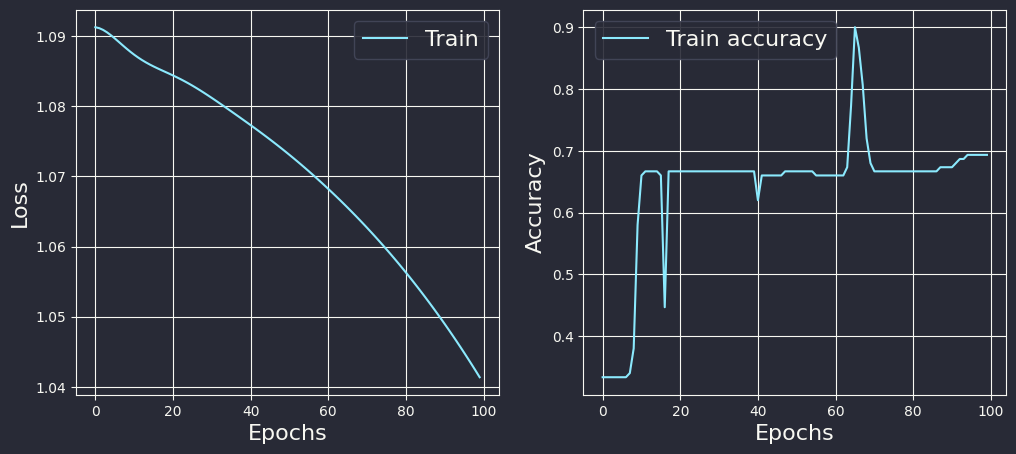

CPU times: user 33.2 s, sys: 772 ms, total: 34 s
Wall time: 11.3 s


In [38]:
%%time
loss, accuracy = evaluate_performance(net, X, y)

### GPU

In [39]:
if torch.cuda.is_available():
    gpu_device = torch.device("cuda")
elif torch.has_mps:
    gpu_device = torch.device("mps")

In [40]:
gpu_cls = Classifier()
gpu_cls.to(gpu_device)

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

In [44]:
X_mps = torch.tensor(X.clone().detach(), device=gpu_device)
y_mps = torch.tensor(y.clone().detach(), device=gpu_device)

/var/folders/3h/dhhfcbhd3pl2ss8czvd22c080000gn/T/ipykernel_36754/65880530.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_mps = torch.tensor(X.clone().detach(), device=gpu_device)
/var/folders/3h/dhhfcbhd3pl2ss8czvd22c080000gn/T/ipykernel_36754/65880530.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_mps = torch.tensor(y.clone().detach(), device=gpu_device)


Epoch 99... (Train) NLL: 1.086\Accuracy: 0.687

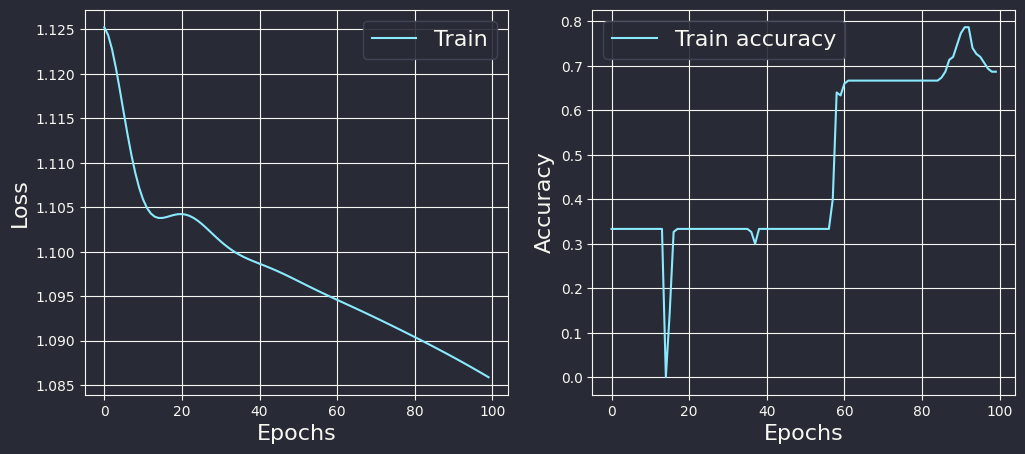

CPU times: user 34.6 s, sys: 754 ms, total: 35.3 s
Wall time: 11.9 s


In [45]:
%%time
loss, accuracy = evaluate_performance(gpu_cls, X_mps, y_mps)

Somewhy there's no improvement in performance after switching from CPU to GPU (M2 Max)

## Experiment 2

Let's use classifier network with more complex architecture to try to see the difference in performace.

In [46]:
class ComplexClassifier(nn.Module):
    def __init__(self):
        super(ComplexClassifier, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(4, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 3),
            nn.LogSoftmax()
        )

    def forward(self, input):
        output = self.layers(input)

        return output

### CPU

In [47]:
cpu_device = torch.device("cpu")

In [48]:
complex_cls = ComplexClassifier()
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=32, out_features=3, bias=True)
    (7): LogSoftmax(dim=None)
  )
)

Epoch 99... (Train) NLL: 1.096\Accuracy: 0.693

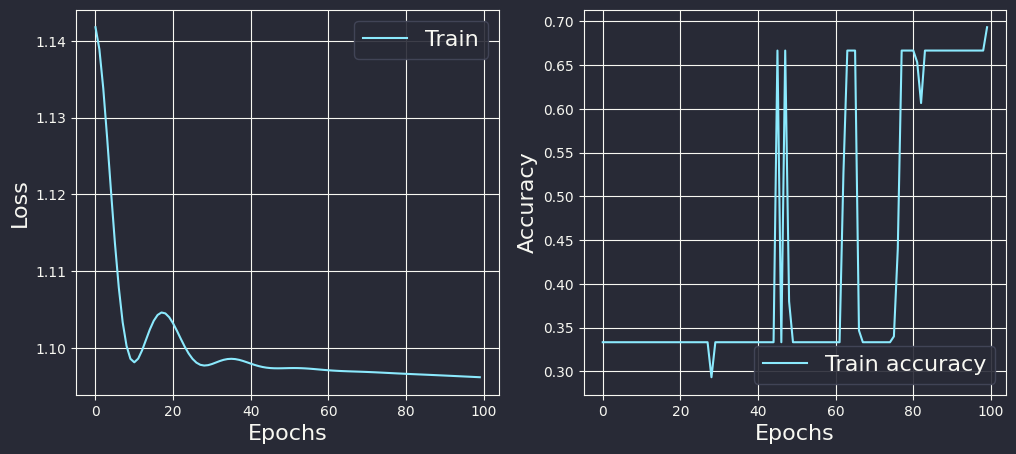

CPU times: user 33.9 s, sys: 774 ms, total: 34.6 s
Wall time: 11.5 s


([1.1417670249938965,
  1.1389001607894897,
  1.1338163614273071,
  1.1273514032363892,
  1.1203776597976685,
  1.1136815547943115,
  1.1078740358352661,
  1.1033459901809692,
  1.10026216506958,
  1.0985863208770752,
  1.0981295108795166,
  1.0986056327819824,
  1.0996856689453125,
  1.1010452508926392,
  1.1024006605148315,
  1.103531837463379,
  1.1042932271957397,
  1.1046154499053955,
  1.1044974327087402,
  1.103992223739624,
  1.1031923294067383,
  1.1022104024887085,
  1.1011627912521362,
  1.1001555919647217,
  1.0992735624313354,
  1.0985736846923828,
  1.09808349609375,
  1.0978022813796997,
  1.09770667552948,
  1.0977565050125122,
  1.097902774810791,
  1.0980956554412842,
  1.0982900857925415,
  1.0984500646591187,
  1.098551869392395,
  1.0985839366912842,
  1.0985461473464966,
  1.0984479188919067,
  1.0983047485351562,
  1.098134994506836,
  1.0979571342468262,
  1.0977879762649536,
  1.0976399183273315,
  1.0975209474563599,
  1.097434639930725,
  1.0973798036575317,


In [49]:
%%time
evaluate_performance(complex_cls, X, y, epochs=100)

# Animation

Uncomment this section, if you want to see the process of learning by epoch.

In [26]:
# def get_preds(net, X, y, epochs, learning_rate):
#     loss = nn.NLLLoss()
#     optimizer = torch.optim.SGD(params=net.parameters(), lr=learning_rate, momentum=0.9)
#     predictions = []
#
#     for epoch in range(epochs):
#         net.train()
#         net.zero_grad()
#         prediction = net(X)
#         predictions.append(prediction)
#         loss_batch = loss(prediction, y)
#         loss_batch.backward()
#         optimizer.step()
#     return predictions

In [27]:
# classifier = Classifier()
# epoch_max = 100
#
# X = torch.tensor(iris.data).to(torch.float32)
# y = torch.tensor(iris.target).to(torch.long)
# predictions = get_preds(classifier, X, y, epoch_max, learning_rate=0.01)

In [28]:
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams["animation.embed_limit"] = "100"

In [29]:
# fig = plt.figure(figsize=(9,9))
# ax1 = fig.add_subplot(1, 2, 1, projection="3d")
# ax2 = fig.add_subplot(1, 2, 2, projection="3d")
#
# def update(i):
#     fig.suptitle(i)
#     ax1.cla()
#     ax1.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=df[keys[4]])
#     ax1.set_title("ground truth")
#
#     ax2.cla()
#     ax2.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=np.argmax(predictions[i].data.numpy(), axis=1))
#     ax2.set_title("prediction")
#
#
# animation.FuncAnimation(fig, update, interval=100, frames=range(epoch_max))